In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import pandas as pd
from astropy.io import ascii
import scipy.stats as stats
import requests
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
cfpTableBerger = pd.read_csv("cfpTable_Berger2020.csv")
cfpTable = pd.read_csv("cfpTable.csv")


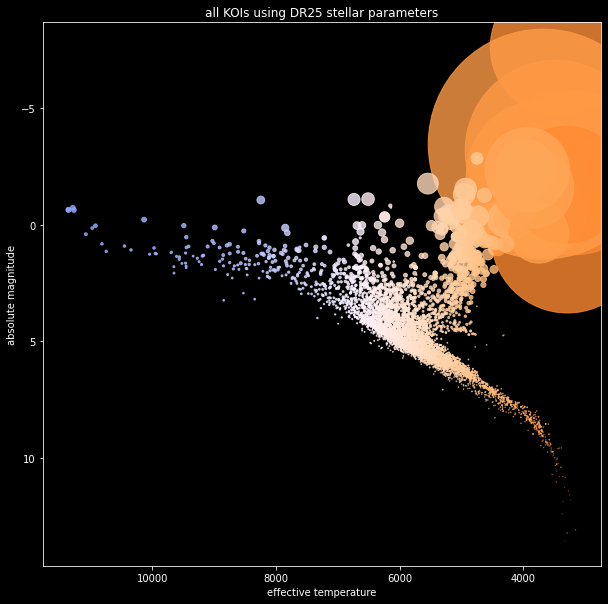

In [3]:
plt.style.use("dark_background")

plt.figure(figsize=(10,10))
plt.scatter(cfpTable.teff, cfpTable.absoluteKepmag, alpha=0.8, 
            c = np.transpose([cfpTable["teffR"],cfpTable["teffG"],cfpTable["teffB"]]), 
            s = cfpTable["radius"]**2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
xl = plt.xlim()
yl = plt.ylim()
plt.title('all KOIs using DR25 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

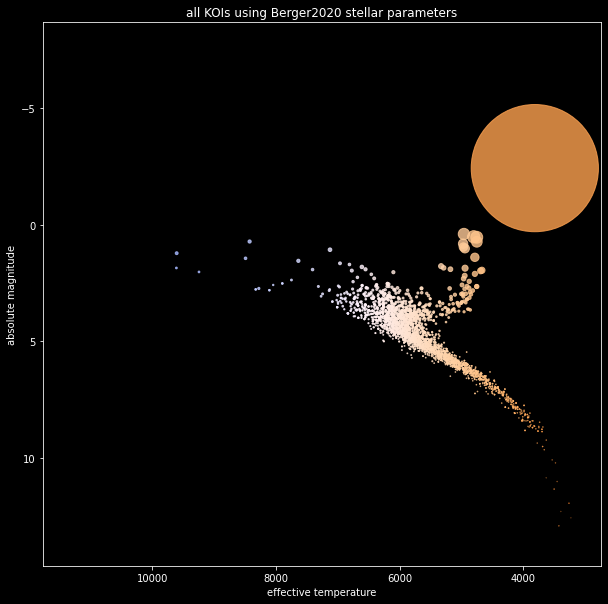

In [4]:

plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.iso_teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["radiusBerger"]**2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2020 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

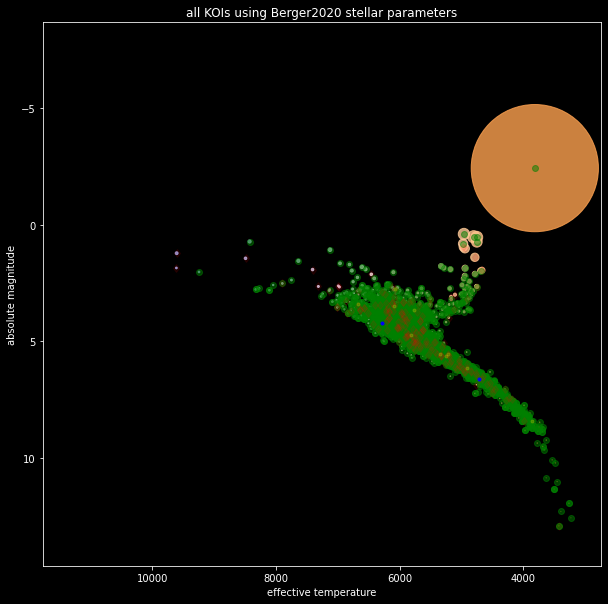

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.iso_teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["radiusBerger"]**2)
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
fp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
fpwgFp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "CERTIFIED FP"];
fpwgFa = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "CERTIFIED FA"];
plt.plot(pc.iso_teff, pc.absoluteKepmagBerger, 'o', c='g', alpha=0.5)
plt.plot(fp.iso_teff, fp.absoluteKepmagBerger, 'd', c='r', alpha=0.1)
plt.plot(fpwgFp.iso_teff, fpwgFp.absoluteKepmagBerger, '.', c='y', alpha=0.3)
plt.plot(fpwgFa.iso_teff, fpwgFa.absoluteKepmagBerger, '.', c='b', alpha=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2020 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

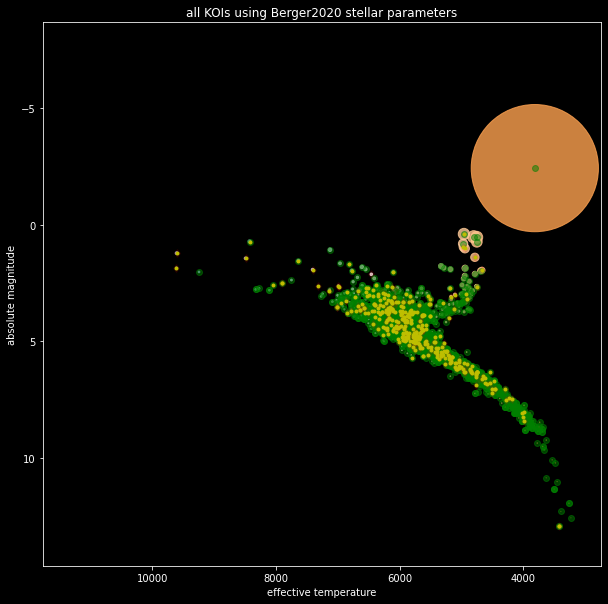

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.iso_teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["radiusBerger"]**2)
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
fp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
fpwgPp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET"];
plt.plot(pc.iso_teff, pc.absoluteKepmagBerger, 'o', c='g', alpha=0.5)
plt.plot(fp.iso_teff, fp.absoluteKepmagBerger, 'd', c='r', alpha=0.1)
plt.plot(fpwgPp.iso_teff, fpwgPp.absoluteKepmagBerger, '.', c='y', alpha=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2020 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

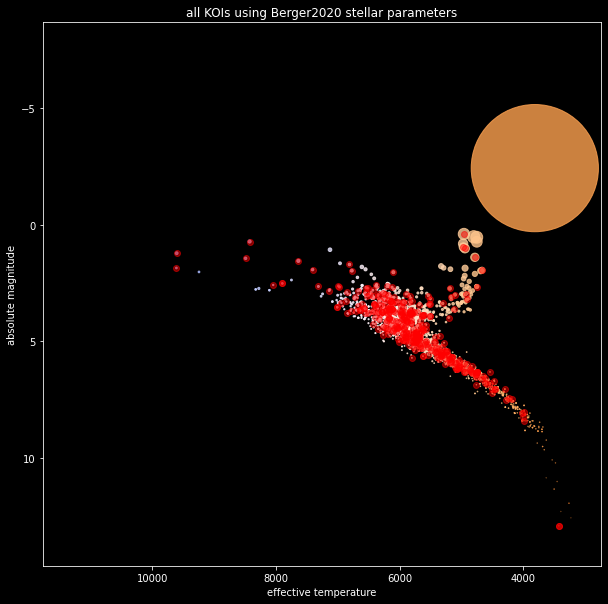

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.iso_teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["radiusBerger"]**2)
bigFp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
plt.plot(fpwgPp.iso_teff, fpwgPp.absoluteKepmagBerger, 'o', c='r', alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2020 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

In [8]:
list(cfpTableBerger)

['kepoi_name',
 'fpwg_koi_period',
 'fpwg_disp_status',
 'fpwg_disp_source',
 'fpwg_disp_eb',
 'fpwg_disp_offst',
 'fpwg_disp_perep',
 'fpwg_disp_other',
 'fpwg_flux_ss',
 'fpwg_flux_slflum',
 'fpwg_flux_oedp',
 'fpwg_flux_vshape',
 'fpwg_flux_depth',
 'fpwg_flux_dilutn',
 'fpwg_flux_lcurve',
 'fpwg_flux_ootvar',
 'fpwg_flux_corvar',
 'fpwg_flux_other',
 'fpwg_flux_stellr',
 'fpwg_flux_noteb',
 'fpwg_offst_sig',
 'fpwg_offst_badim',
 'fpwg_offst_inval',
 'fpwg_offst_vis',
 'fpwg_offst_star',
 'fpwg_offst_qvars',
 'fpwg_offst_other',
 'fpwg_offst_nooff',
 'fpwg_perep_match',
 'fpwg_perep_direc',
 'fpwg_perep_col',
 'fpwg_perep_ghost',
 'fpwg_perep_video',
 'fpwg_perep_ref',
 'fpwg_fa_starvar',
 'fpwg_fa_unique',
 'fpwg_fa_thermal',
 'fpwg_fa_ntl',
 'fpwg_fa_artifact',
 'fpwg_fa_other',
 'fpwg_fa_notfa',
 'fpwg_fop_rvs1',
 'fpwg_fop_rvs2',
 'fpwg_fop_rvs3',
 'fpwg_fop_dblline',
 'fpwg_fop_imexam',
 'fpwg_fop_imblend',
 'fpwg_efp_public',
 'fpwg_efp_pubexam',
 'fpwg_efp_accept',
 'fpwg_ob

/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0, 0.5, 'Berger2020 planet radius')

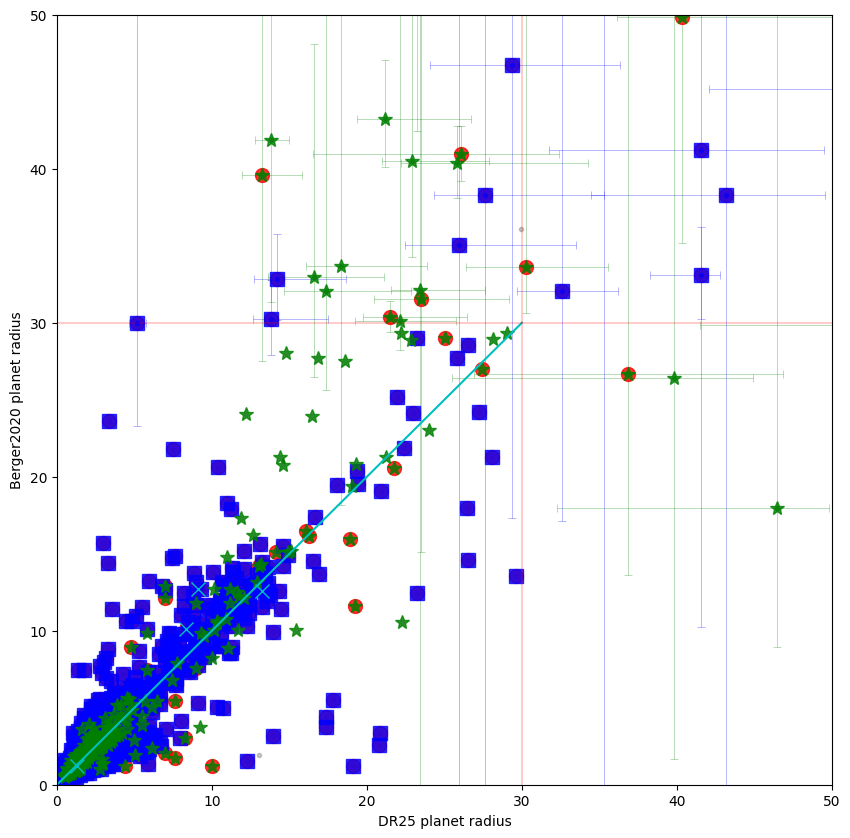

In [9]:
plt.style.use("default")
capsize = 3
elWidth = 0.4

plt.figure(figsize=(10,10))
fpwgPp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET"];
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
pcFP = pc[cfpTableBerger.fpwg_disp_status == "CERTIFIED FP"];
pcNotExamined = pc[cfpTableBerger.fpwg_disp_status == "NOT EXAMINED"];
plt.plot(cfpTableBerger.koi_prad, cfpTableBerger.corrected_prad, 'k.', alpha=0.2)
plt.plot(pc.koi_prad, pc.corrected_prad, 'ro', alpha=0.8, ms=10)
plt.plot(pcNotExamined.koi_prad, pcNotExamined.corrected_prad, 'bs', alpha=0.8, ms=10)
plt.plot(fpwgPp.koi_prad, fpwgPp.corrected_prad, 'g*', alpha=0.8, ms=10)
plt.plot(pcFP.koi_prad, pcFP.corrected_prad, 'cx', alpha=1, ms=10)

largePcNotExamined = pcNotExamined[(pcNotExamined.koi_prad > 30) | (pcNotExamined.corrected_prad > 30)];
plt.errorbar(largePcNotExamined.koi_prad, largePcNotExamined.corrected_prad, 
             xerr = np.vstack((-largePcNotExamined.koi_prad_err1, largePcNotExamined.koi_prad_err2)),
             yerr = np.vstack((-largePcNotExamined.corrected_prad_err1, largePcNotExamined.corrected_prad_err2)),             
            fmt = 'b.', elinewidth = elWidth, capsize = capsize, capthick = elWidth, alpha = 0.5)

largeFpwgPp = fpwgPp[(fpwgPp.koi_prad > 30) | (fpwgPp.corrected_prad > 30)];
plt.errorbar(largeFpwgPp.koi_prad, largeFpwgPp.corrected_prad, 
             xerr = np.vstack((-largeFpwgPp.koi_prad_err1, largeFpwgPp.koi_prad_err2)),
             yerr = np.vstack((-largeFpwgPp.corrected_prad_err1, largeFpwgPp.corrected_prad_err2)),             
            fmt = 'g.', elinewidth = elWidth, capsize = capsize, capthick = elWidth, alpha = 0.5)


plt.plot([0,30], [0,30], 'c')
plt.plot([0,50], [30,30], 'r', alpha=0.2)
plt.plot([30,30], [0,50], 'r', alpha=0.2)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("DR25 planet radius")
plt.ylabel("Berger2020 planet radius")

In [10]:
ppGotBig = (cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET") \
    & (fpwgPp.koi_prad < 30) & (fpwgPp.corrected_prad > 30)
fpwgPp = cfpTableBerger[ppGotBig];


In [11]:
fpwgPp

,kepoi_name,fpwg_koi_period,fpwg_disp_status,fpwg_disp_source,fpwg_disp_eb,fpwg_disp_offst,fpwg_disp_perep,fpwg_disp_other,fpwg_flux_ss,fpwg_flux_slflum,...,gaia_iso_sma_errp,gaia_iso_sma_errm,gaia_iso_insol,gaia_iso_insol_errp,gaia_iso_insol_errm,ZAMSFlux,Flag,corrected_prad,corrected_prad_err1,corrected_prad_err2
277,K02141.01,1.31,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000565,0.000750,6725.133414,632.470259,646.187890,3270.469096,NaN,33.681520,1396.147921,-15.533350
375,K00185.01,23.21,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005278,0.003743,131.394748,15.541517,13.415138,59.807500,NaN,43.257828,3.784519,-3.118428
475,K04056.01,3.95,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001247,0.001240,602.828540,57.681200,53.496301,291.832549,AO,31.551679,884.008252,-16.465308
921,K04632.01,40.07,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010061,0.006567,97.131510,21.781666,17.716929,40.228362,NaN,39.581636,1682.625769,-12.089052
1129,K05308.01,9.94,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002097,0.001657,138.853509,12.782655,11.241918,55.770495,AO,30.118571,29.454939,-1.872213
1279,K00871.01,12.94,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003068,0.002710,183.570469,24.897189,21.819883,86.974515,NaN,40.480272,17.652149,-6.210696
1674,K01549.01,29.48,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006147,0.005237,93.660143,12.537508,10.894153,42.024552,NaN,32.978687,15.114105,-6.525373
1805,K03761.01,164.96,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025201,0.060057,79.225795,22.071638,24.294901,37.355985,NaN,152.041807,20.845992,-18.017810
1814,K02680.01,14.41,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002531,0.002916,74.823503,7.666494,7.381032,51.527002,NaN,32.131970,7719.419360,-187.550481
1949,K01251.01,0.58,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000333,0.000346,19120.259761,3217.087445,2801.041406,7139.113720,NaN,61.278700,94.371904,-18.857341


/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


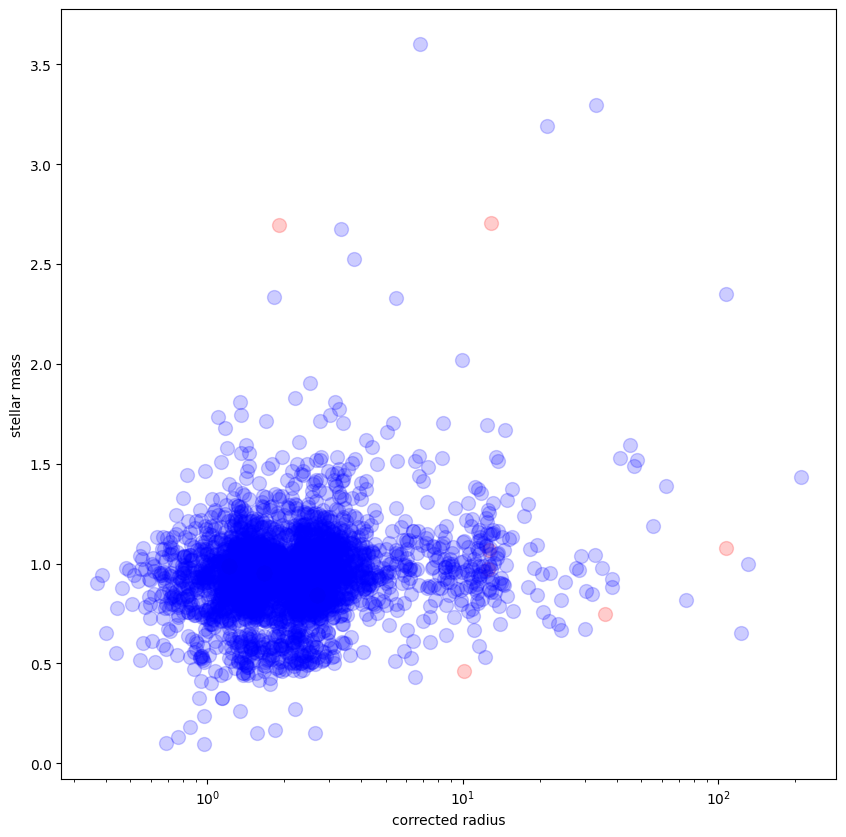

In [12]:
plt.style.use("default")
capsize = 3
elWidth = 0.4

fp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
certifiedFP = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "CERTIFIED FP"];
# pick out the PCs that have not been looked at by the FPWG
pcNotcertifiedFP = pc[cfpTableBerger.fpwg_disp_status == "NOT EXAMINED"];

# plot the certified FPs and the PCs that have not been examined by the FPWG
plt.figure(figsize=(10,10))
plt.semilogx(certifiedFP.corrected_prad, certifiedFP.mass, 'ro', alpha=0.2, ms=10)
plt.semilogx(pcNotcertifiedFP.corrected_prad, pcNotcertifiedFP.mass, 'bo', alpha=0.2, ms=10)
plt.xlabel("corrected radius");
plt.ylabel("stellar mass");


In [13]:
# search for PCs that were not examined but have corrected radius > 30 Earths (we’ll ignore radius 20-30)
strangeIndex = np.where(pcNotcertifiedFP.corrected_prad > 30)
# strangeIndex is an array of arrays, so strangeIndex[0] is the actual array that we want


In [14]:
# list the indices to make sure they make sense
strangeIndex[0]

array([ 134,  205,  224,  359,  722,  799,  928,  957, 1083, 1509, 1617,
       1785, 1902, 1950, 2347, 2435, 2725, 2751, 3052])

In [15]:
len(strangeIndex[0])

19

In [16]:
# list their properties
pcNotcertifiedFP.iloc[strangeIndex[0]]

,kepoi_name,fpwg_koi_period,fpwg_disp_status,fpwg_disp_source,fpwg_disp_eb,fpwg_disp_offst,fpwg_disp_perep,fpwg_disp_other,fpwg_flux_ss,fpwg_flux_slflum,...,gaia_iso_sma_errp,gaia_iso_sma_errm,gaia_iso_insol,gaia_iso_insol_errp,gaia_iso_insol_errm,ZAMSFlux,Flag,corrected_prad,corrected_prad_err1,corrected_prad_err2
148,K01102.03,19.00,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002764,0.003089,71.629402,7.480071,7.029012,50.668968,AO,38.271134,8780.308930,-832.109224
232,K06103.02,122.81,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010976,0.011285,6.482574,0.710690,0.555535,3.975940,AO,47.846661,920.496646,-8.651401
253,K08089.01,141.40,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.032687,0.079210,129.577168,28.317385,34.073642,53.897240,NaN,33.080568,3.116691,-2.839970
405,K06401.01,1.96,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000543,0.000578,6859.445717,739.853219,679.647685,5226.509223,NaN,41.218362,59.528045,-30.954193
822,K08109.01,218.77,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081795,0.052201,6240.025708,3625.973922,2392.949869,3.168546,NaN,210.523968,53.314813,-83.842409
913,K00846.01,27.81,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006054,0.004713,86.726765,16.772773,14.095858,34.145564,NaN,30.255505,2.493150,-2.358195
1054,K05284.01,389.32,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028295,0.025500,1.536306,0.158605,0.142771,0.632763,NaN,38.316912,1022.353809,-66.365251
1089,K00856.01,39.75,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005366,0.005382,89.942349,17.140456,14.710331,33.292756,NaN,32.858971,2.911072,-2.665345
1226,K02578.01,13.33,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003018,0.002941,164.344679,17.918597,16.354084,77.614795,NaN,35.069053,1063.729542,-48.536705
1697,K07865.01,0.52,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000276,0.000327,19881.786345,2079.807210,1994.517383,7183.486952,NaN,74.516996,222.343795,-4.654140


In [17]:
ii = np.where(pcNotcertifiedFP.iloc[strangeIndex[0]].kepoi_name == "K01102.03")
ii

(array([0]),)

In [18]:
# look at individual ones 
pcNotcertifiedFP.iloc[strangeIndex[0][ii]]

,kepoi_name,fpwg_koi_period,fpwg_disp_status,fpwg_disp_source,fpwg_disp_eb,fpwg_disp_offst,fpwg_disp_perep,fpwg_disp_other,fpwg_flux_ss,fpwg_flux_slflum,...,gaia_iso_sma_errp,gaia_iso_sma_errm,gaia_iso_insol,gaia_iso_insol_errp,gaia_iso_insol_errm,ZAMSFlux,Flag,corrected_prad,corrected_prad_err1,corrected_prad_err2
148,K01102.03,19.0,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002764,0.003089,71.629402,7.480071,7.029012,50.668968,AO,38.271134,8780.30893,-832.109224


In [19]:
# we can still look at individual properties
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].koi_prad

148    43.17
Name: koi_prad, dtype: float64

In [20]:
[pcNotcertifiedFP.iloc[strangeIndex[0][ii]].koi_ror, pcNotcertifiedFP.iloc[strangeIndex[0][ii]].koi_ror_err1, pcNotcertifiedFP.iloc[strangeIndex[0][ii]].koi_ror_err2]

[148    0.318792
 Name: koi_ror, dtype: float64,
 148    73.13847
 Name: koi_ror_err1, dtype: float64,
 148   -6.931319
 Name: koi_ror_err2, dtype: float64]

In [21]:
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].corrected_prad

148    38.271134
Name: corrected_prad, dtype: float64

In [22]:
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].radius

148    1.24
Name: radius, dtype: float64

In [23]:
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].radiusBerger

148    1.099
Name: radiusBerger, dtype: float64

In [24]:
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].radiusBerger_err1

148    0.039
Name: radiusBerger_err1, dtype: float64

In [25]:
pcNotcertifiedFP.iloc[strangeIndex[0][ii]].radiusBerger_err2

148    0.037
Name: radiusBerger_err2, dtype: float64

In [26]:
pcNotcertifiedFP.iloc[strangeIndex[0]].kepoi_name

148     K01102.03
232     K06103.02
253     K08089.01
405     K06401.01
822     K08109.01
913     K00846.01
1054    K05284.01
1089    K00856.01
1226    K02578.01
1697    K07865.01
1816    K04390.01
2003    K08163.01
2134    K08279.01
2193    K06194.01
2638    K01957.01
2740    K00735.01
3060    K01426.03
3091    K08046.01
3428    K08078.01
Name: kepoi_name, dtype: object